DATA LOADING AND PREPROCESSING
Loading data...
Dataset Shape: (26049, 15)
Handling missing values...

Missing values after replacing '?' with NaN:
age                  0
workclass         1471
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1476
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     450
income               0
dtype: int64

Identified 8 categorical columns and 6 numerical columns
Creating encoders for categorical variables...
Creating scaler for numerical features...
Common preprocessing complete.

EXPLORATORY DATA ANALYSIS


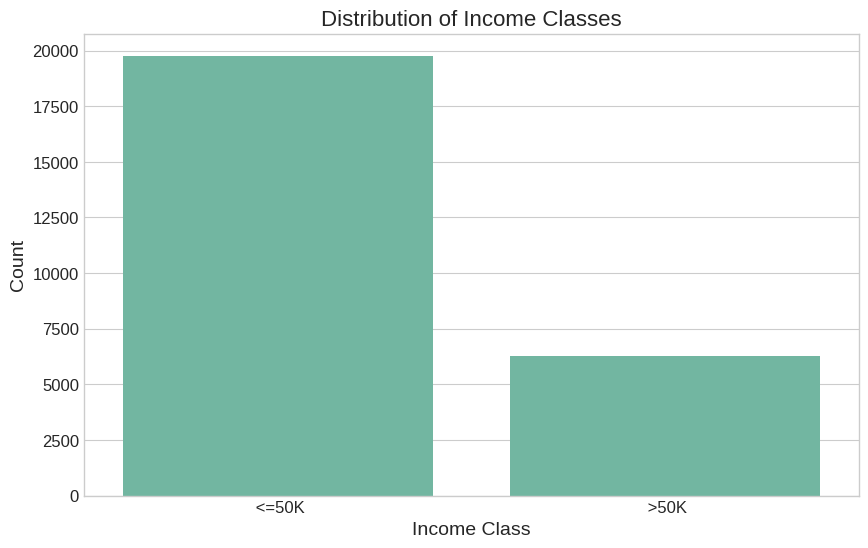


Percentage of income classes:
income
<=50K    75.918461
>50K     24.081539
Name: proportion, dtype: float64

The dataset is imbalanced with 75.92% of individuals earning <=50K and only 24.08% earning >50K


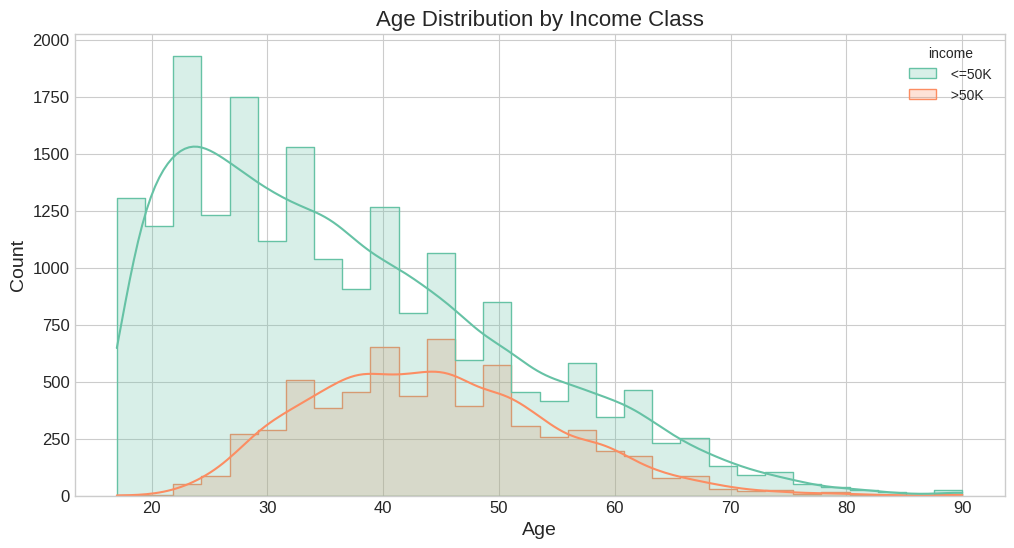

<Figure size 1400x800 with 0 Axes>

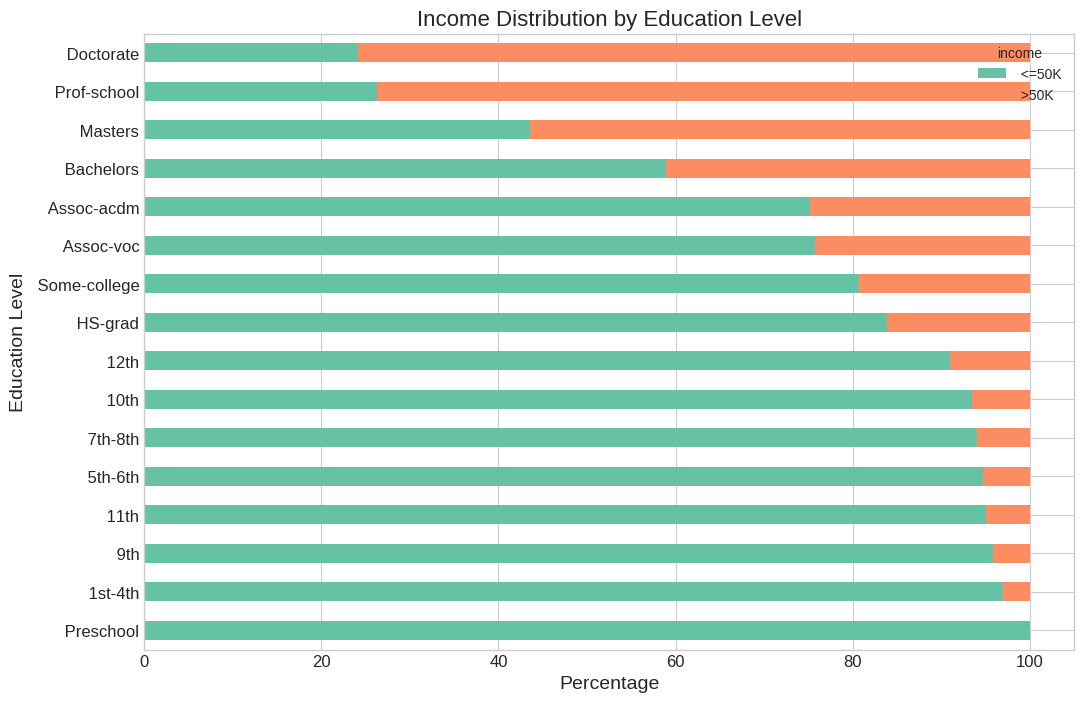

<Figure size 1000x600 with 0 Axes>

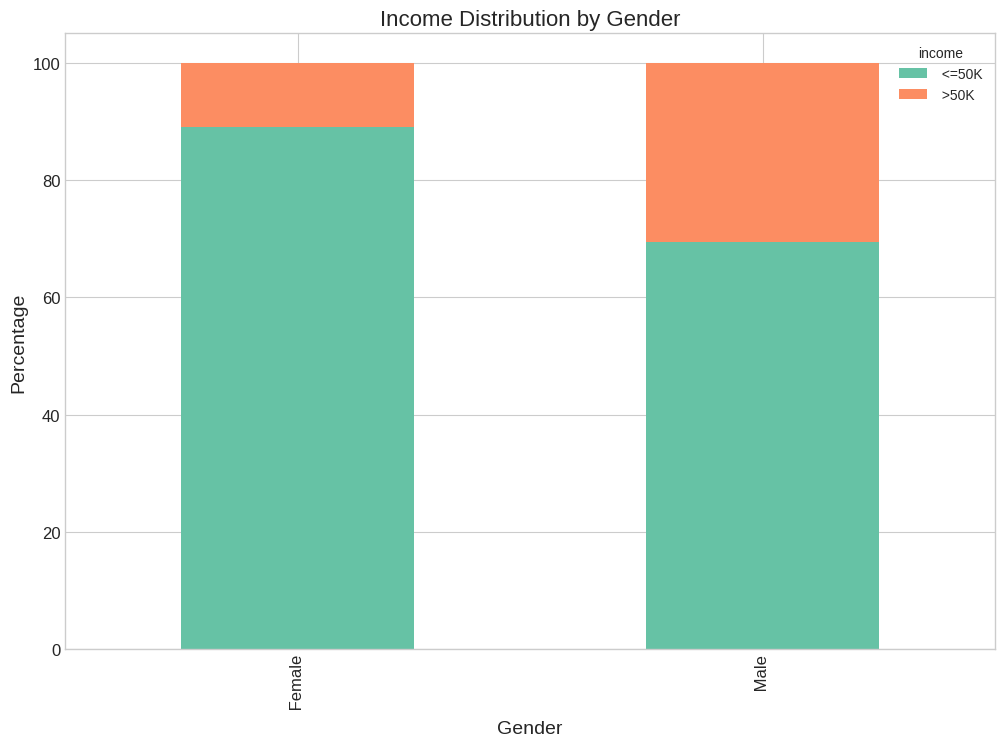

<Figure size 1400x800 with 0 Axes>

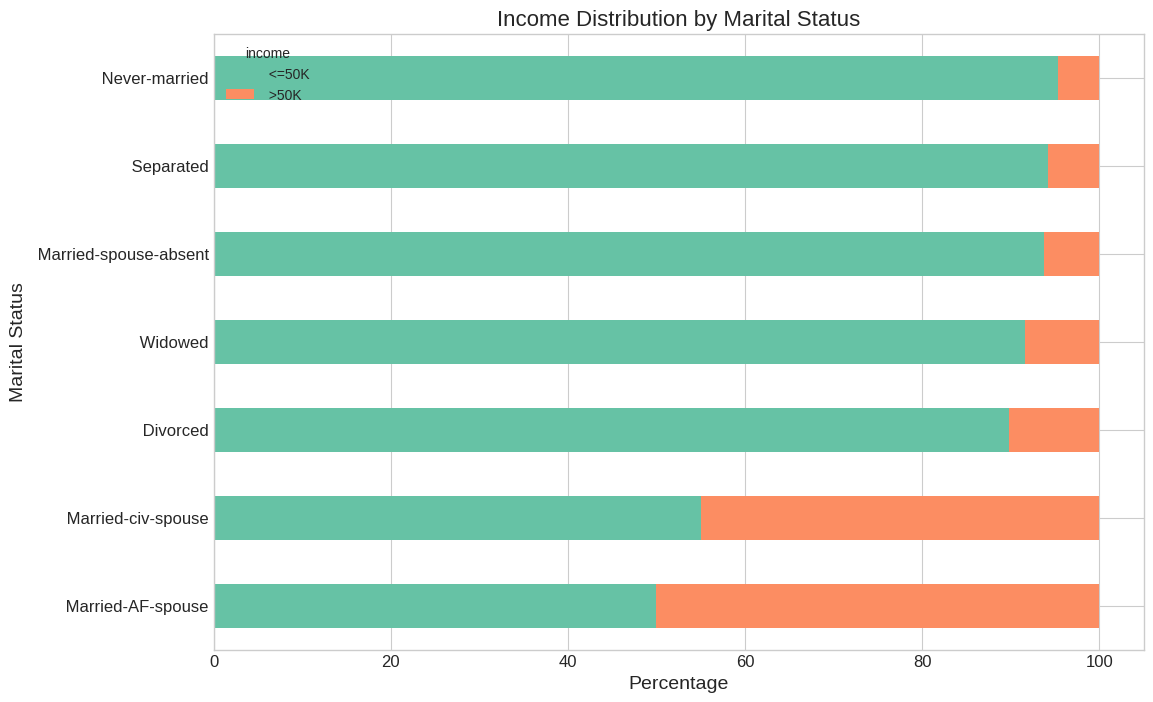

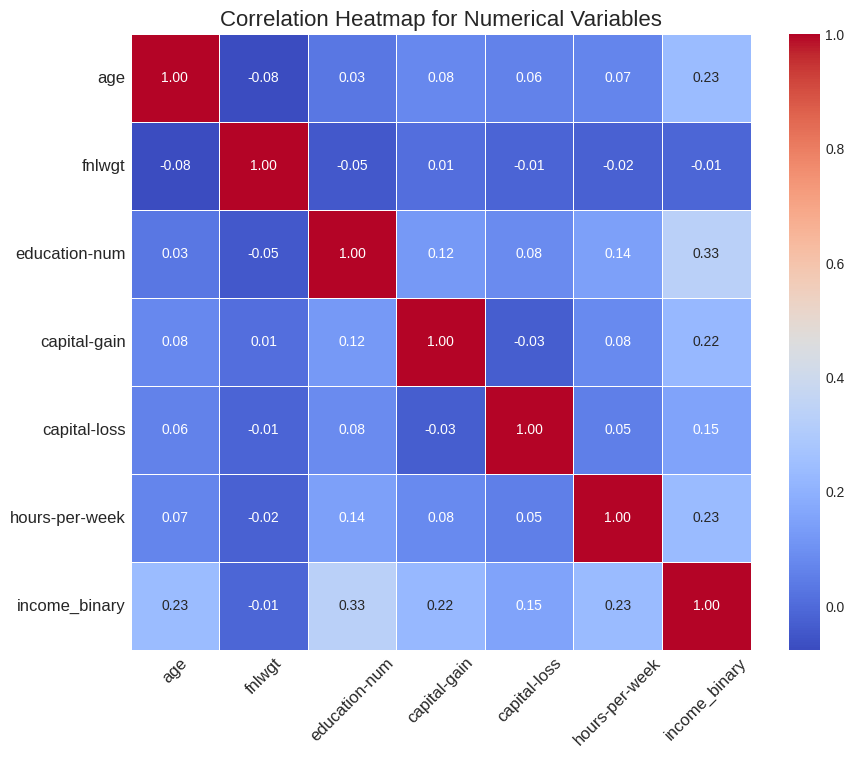


Key EDA insights:
1. The dataset is imbalanced with more '<=50K' instances than '>50K'
2. Higher education levels correspond to higher income
3. Gender shows a significant income disparity
4. Marital status affects income probability
5. Age distribution shows that higher incomes are more common in middle age groups

MODEL TRAINING AND EVALUATION

Preparing data for modeling...

LOGISTIC REGRESSION MODEL
Training Logistic Regression model...
Making predictions...

Logistic Regression Performance Metrics:
Confusion Matrix:
[[4371  157]
 [1100  387]]
Accuracy: 0.7910
Sensitivity (Recall for >50K): 0.2603
Specificity (Recall for <=50K): 0.9653


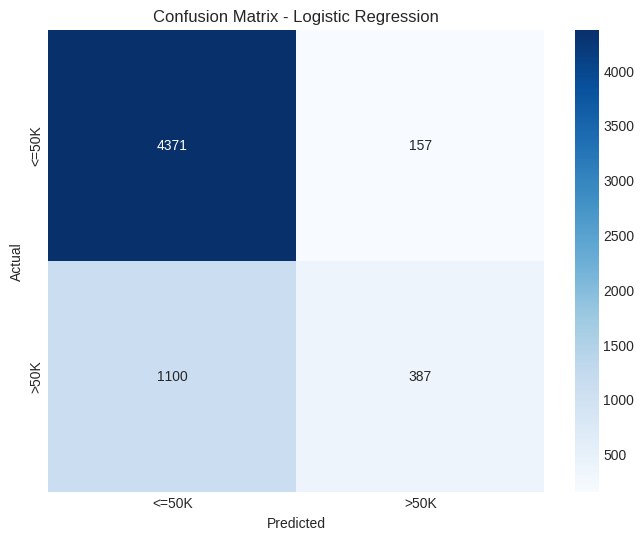

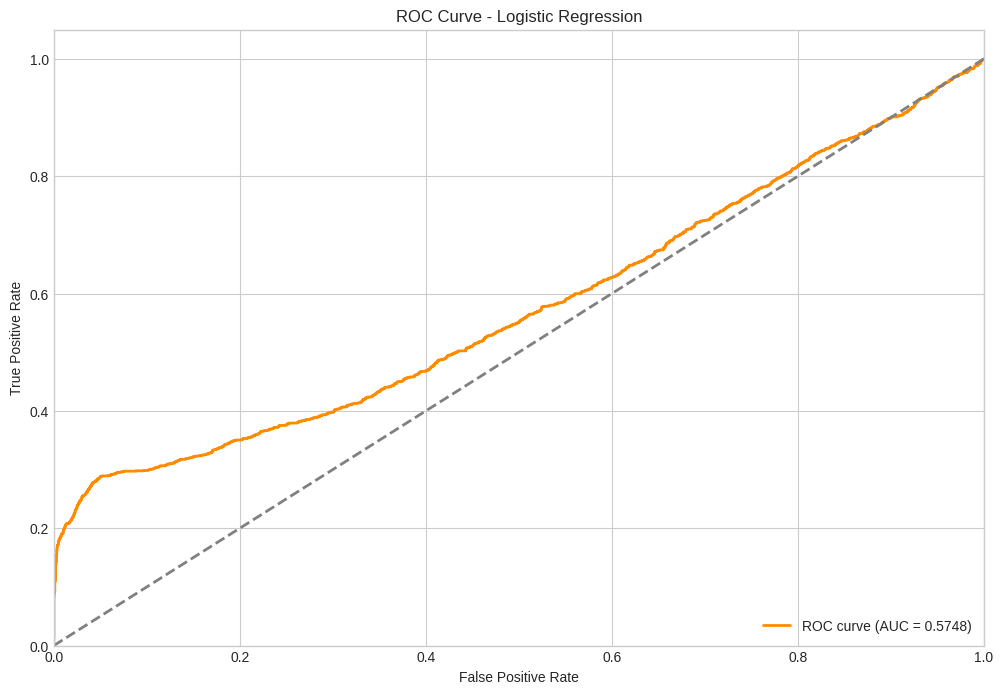

Time taken for Logistic Regression: 0.60 seconds

SUPPORT VECTOR MACHINE (SVM) MODEL
Loading and preprocessing data for SVM...
Encoding categorical variables...
Applying SMOTE to balance classes...
Standardizing features...
Training SVM model with optimal parameters...
Making predictions...

SVM Performance Metrics:
Confusion Matrix:
[[4060  884]
 [ 338 1230]]
Accuracy: 0.8123
Sensitivity (Recall for >50K): 0.7844
Specificity (Recall for <=50K): 0.8212


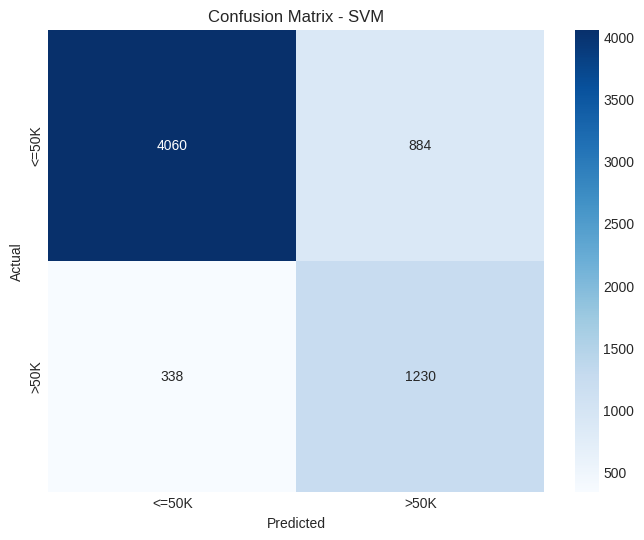

Time taken for SVM: 38.42 seconds

RANDOM FOREST MODEL
Loading and preprocessing data for Random Forest...
Encoding categorical features...
Training Random Forest with hyperparameter tuning...
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Making predictions...

Random Forest Performance Metrics:
Confusion Matrix:
[[4253  275]
 [ 565  922]]
Accuracy: 0.8603
Sensitivity (Recall for >50K): 0.6200
Specificity (Recall for <=50K): 0.9393


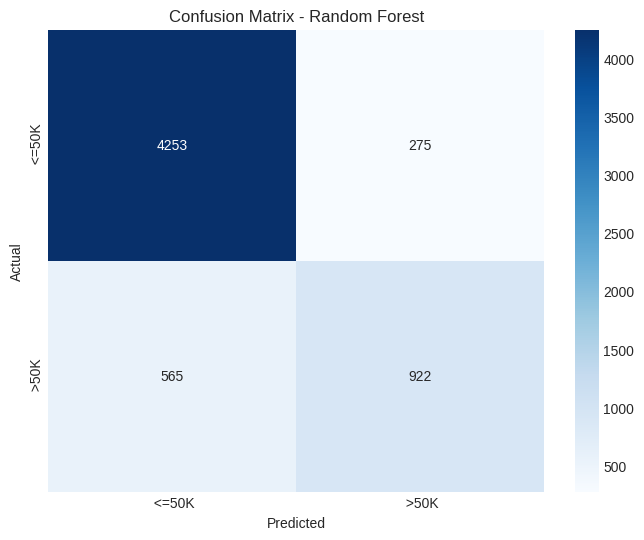

Visualizing feature importance...


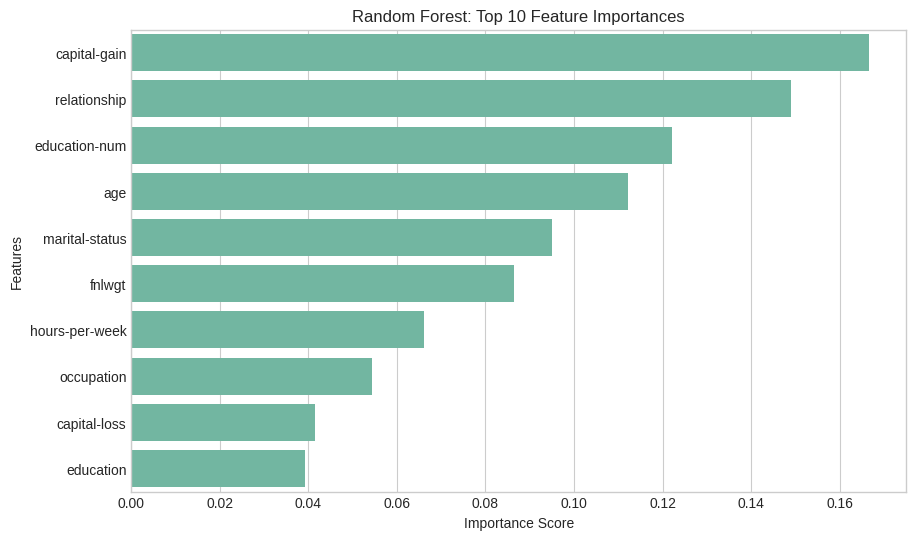

Time taken for Random Forest: 195.49 seconds

XGBOOST MODEL
Loading and preprocessing data for XGBoost...
Applying preprocessing transformations...
Training XGBoost model...
Making predictions...

XGBoost Performance Metrics:
Confusion Matrix:
[[4676  268]
 [ 574  994]]
Accuracy: 0.8707
Sensitivity (Recall for >50K): 0.6339
Specificity (Recall for <=50K): 0.9458


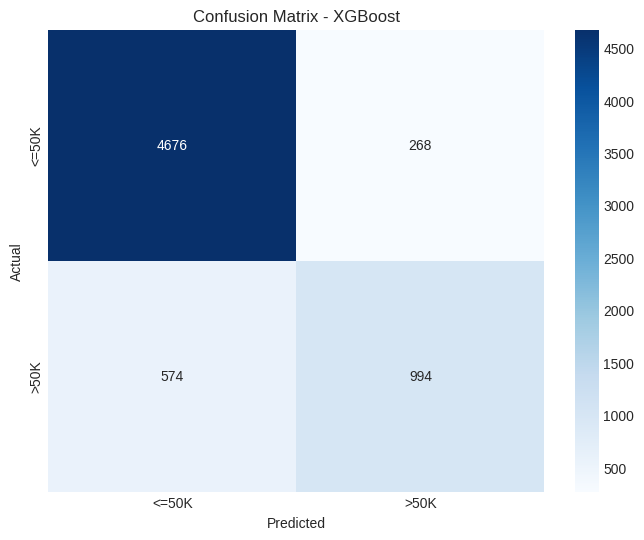

Visualizing feature importance...


<Figure size 1200x800 with 0 Axes>

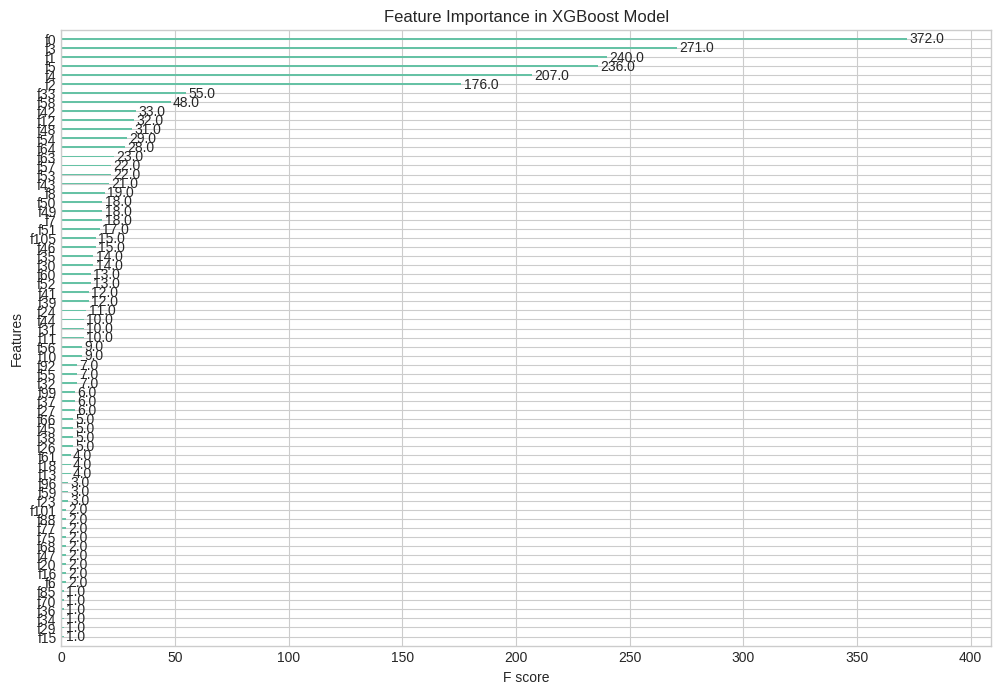

Time taken for XGBoost: 1.11 seconds

NEURAL NETWORK MODEL
Loading and preprocessing data for Neural Network...
Applying SMOTE to balance classes...
Standardizing features...
Training Neural Network model...
Making predictions...

Neural Network Performance Metrics:
Confusion Matrix:
[[4549  395]
 [ 601  967]]
Accuracy: 0.8471
Sensitivity (Recall for >50K): 0.6167
Specificity (Recall for <=50K): 0.9201


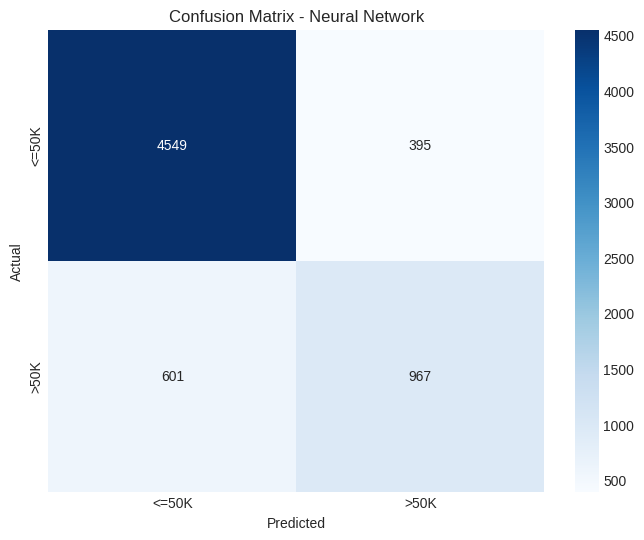

Plotting training history...


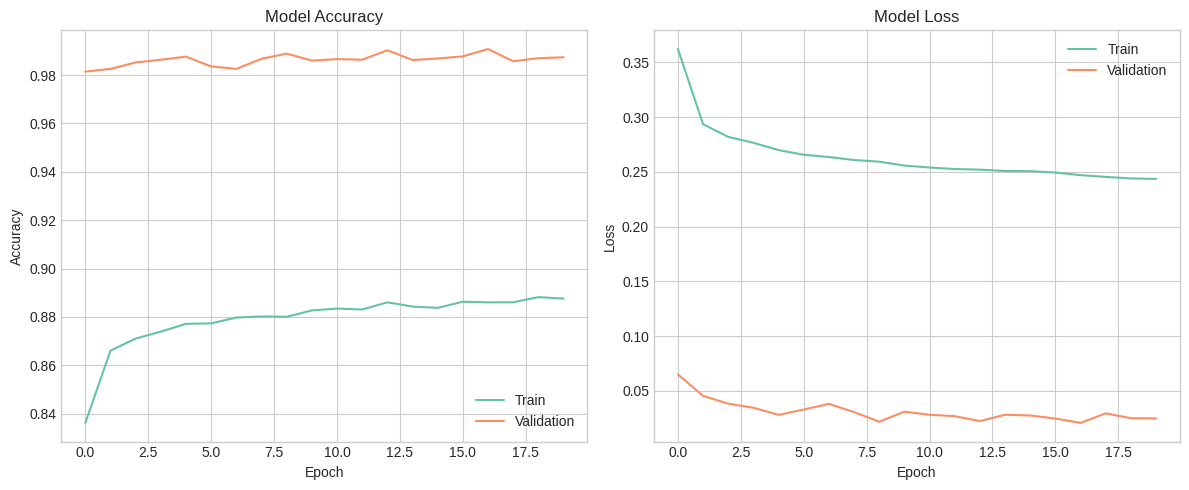

Time taken for Neural Network: 47.94 seconds

MODEL COMPARISON AND CONCLUSIONS

Model Comparison (Ranked by Accuracy):
              Model Accuracy Sensitivity Specificity F1 Score Training Time (s)
            XGBoost   0.8707      0.6339      0.9458   0.7591              1.11
      Random Forest   0.8603      0.6200      0.9393   0.7470            195.49
     Neural Network   0.8471      0.6167      0.9201   0.7385             47.94
                SVM   0.8123      0.7844      0.8212   0.8024             38.42
Logistic Regression   0.7910      0.2603      0.9653   0.4100              0.60


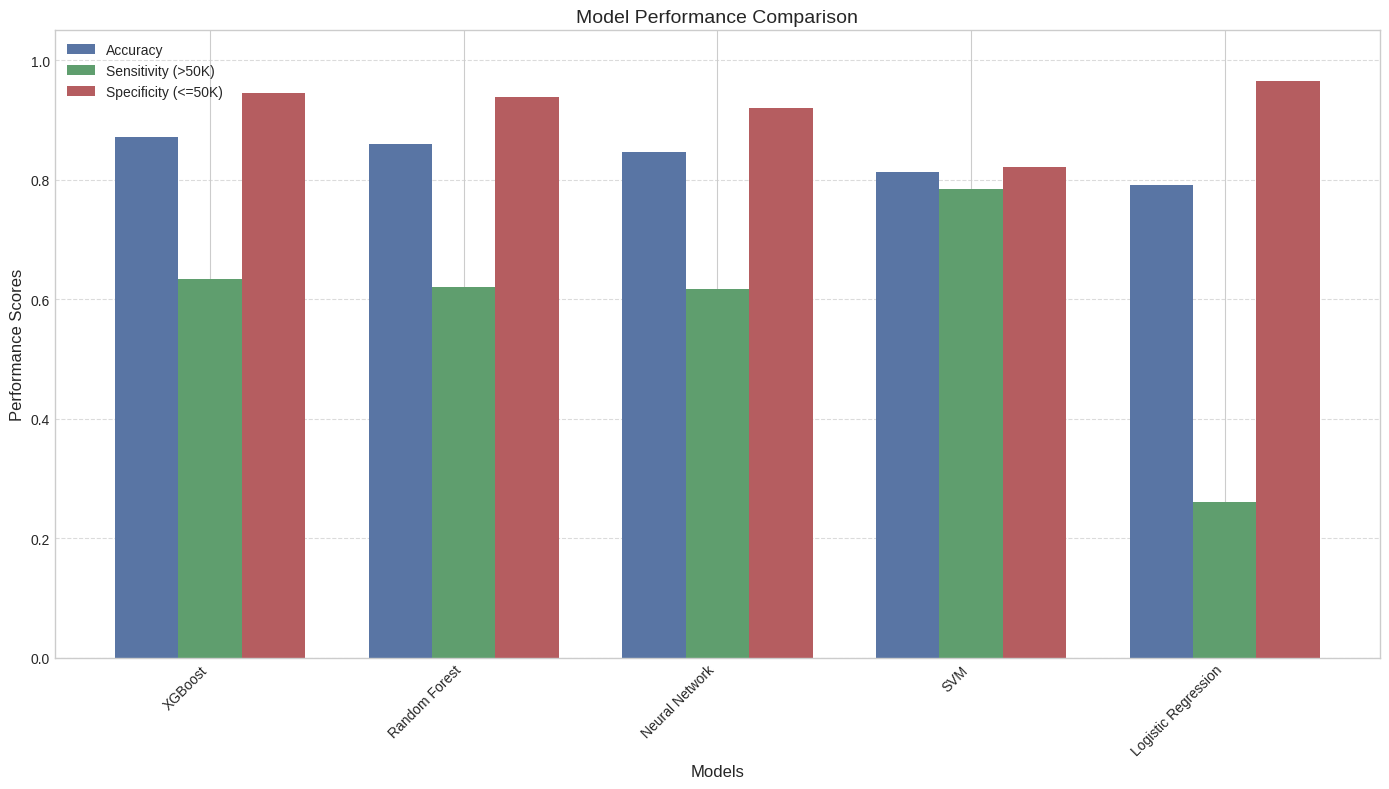

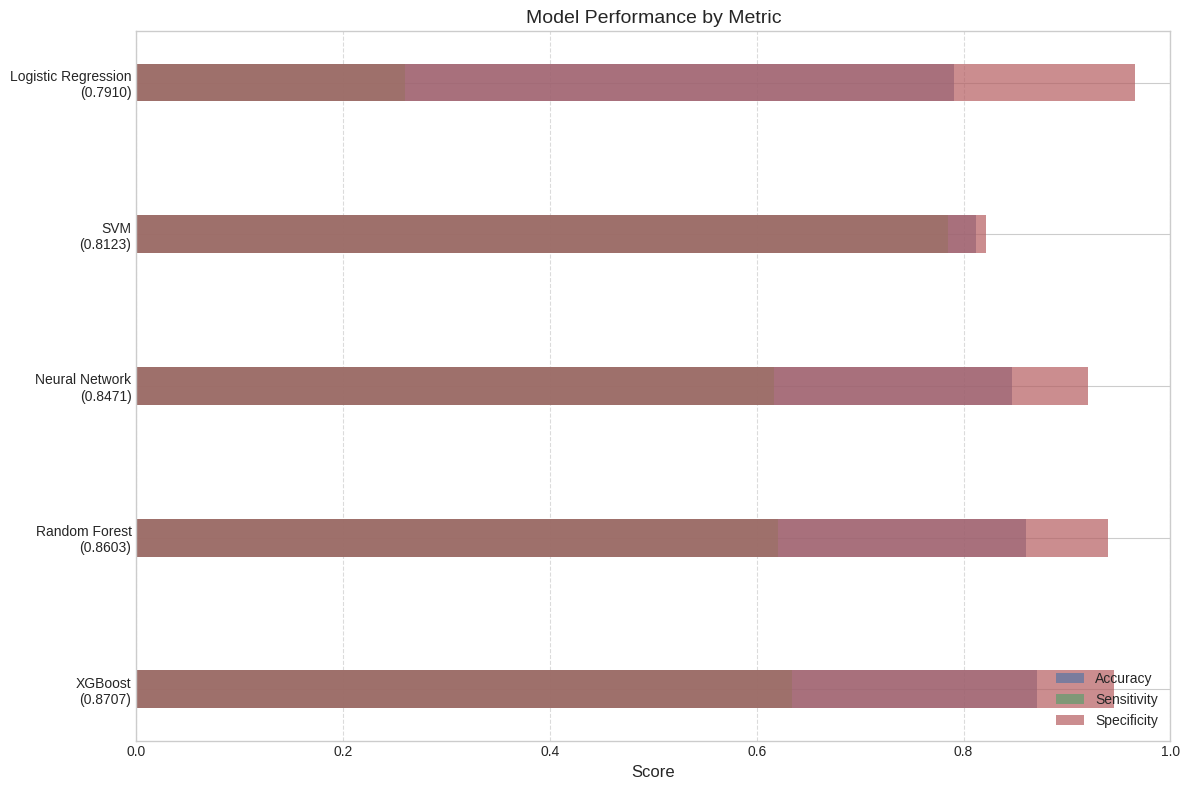

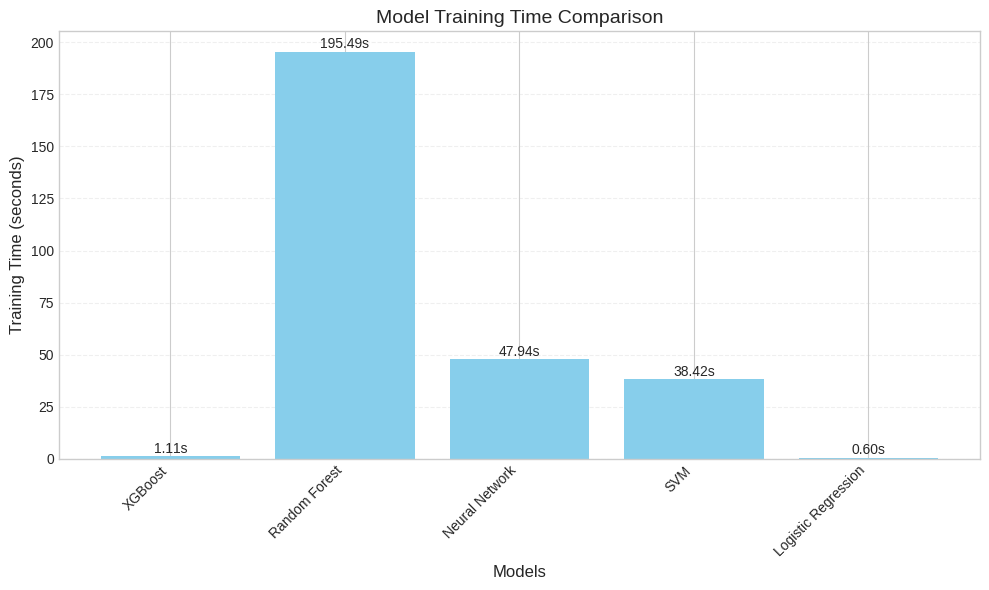


CONCLUSION
The XGBoost model achieves the best overall performance with:
- Accuracy: 0.8707
- Sensitivity (for >50K income): 0.6339
- Specificity (for <=50K income): 0.9458

Performance Summary by Model (ranked by accuracy):
1. XGBoost: Accuracy = 0.8707, Sensitivity = 0.6339, Specificity = 0.9458, Training Time = 1.11s
2. Random Forest: Accuracy = 0.8603, Sensitivity = 0.6200, Specificity = 0.9393, Training Time = 195.49s
3. Neural Network: Accuracy = 0.8471, Sensitivity = 0.6167, Specificity = 0.9201, Training Time = 47.94s
4. SVM: Accuracy = 0.8123, Sensitivity = 0.7844, Specificity = 0.8212, Training Time = 38.42s
5. Logistic Regression: Accuracy = 0.7910, Sensitivity = 0.2603, Specificity = 0.9653, Training Time = 0.60s

Model Selection Recommendations:
1. For the best overall accuracy: Use XGBoost
2. For the best sensitivity (correctly identifying >50K income): Use SVM
3. For the best specificity (correctly identifying <=50K income): Use Logistic Regression
4. For the fastest mo

In [ ]:
###############################################################################
#                                                                             #
#                      INCOME PREDICTION USING MACHINE LEARNING               #
#                                                                             #
# This script analyzes the UCI Adult Income dataset to predict whether an     #
# individual's income exceeds $50K/year based on census data.                 #
#                                                                             #
# Models implemented:                                                         #
# 1. Logistic Regression                                                      #
# 2. Support Vector Machine (SVM)                                             #
# 3. Random Forest                                                            #
# 4. XGBoost                                                                  #
# 5. Neural Network                                                           #
#                                                                             #
###############################################################################

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import copy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

# Set the aesthetic style of the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)

#------------------------------------------------------------------------------
# 1. DATA LOADING AND COMMON PREPROCESSING
#------------------------------------------------------------------------------
print("="*80)
print("DATA LOADING AND PREPROCESSING")
print("="*80)

# Load the data once
# The dataset is from the UCI Machine Learning Repository - Adult Income dataset
# The task is to predict whether income exceeds $50K/yr based on census data
print("Loading data...")
train_data_original = pd.read_csv('train.csv')
test_data_original = pd.read_csv('test.csv')

# Display basic information about the dataset
print("Dataset Shape:", train_data_original.shape)

# Replace '?' with NaN for proper handling (common preprocessing step)
# The dataset uses '?' to represent missing values, which we convert to NaN for easier handling
print("Handling missing values...")
train_data = train_data_original.replace(' ?', np.nan)
test_data = test_data_original.replace(' ?', np.nan)

# Check for missing values after replacement
print("\nMissing values after replacing '?' with NaN:")
print(train_data.isna().sum())

# Identify categorical and numerical columns (will be used by multiple models)
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'income' from feature lists if it exists
if 'income' in categorical_cols:
    categorical_cols.remove('income')
if 'income' in numeric_cols:
    numeric_cols.remove('income')

print(f"\nIdentified {len(categorical_cols)} categorical columns and {len(numeric_cols)} numerical columns")

# Create encoders for categorical variables (will be reused by multiple models)
print("Creating encoders for categorical variables...")
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Fit on both train and test data to ensure consistent encoding
    combined_col = pd.concat([train_data[col].fillna('missing'), test_data[col].fillna('missing')])
    le.fit(combined_col)
    label_encoders[col] = le

# Create scaler for numerical features (will be reused)
print("Creating scaler for numerical features...")
scaler = StandardScaler()
# We'll fit this later on actual training data

# Prepare the target variable encoder
income_encoder = LabelEncoder()
income_encoder.fit(train_data['income'].fillna('missing'))

print("Common preprocessing complete.")

#------------------------------------------------------------------------------
# 2. EXPLORATORY DATA ANALYSIS (EDA)
#------------------------------------------------------------------------------
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Count of target variable (income)
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=train_data)
plt.title('Distribution of Income Classes', fontsize=16)
plt.xlabel('Income Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate percentage of each class
income_counts = train_data['income'].value_counts(normalize=True) * 100
print("\nPercentage of income classes:")
print(income_counts)
print(f"\nThe dataset is imbalanced with {income_counts[' <=50K']:.2f}% of individuals earning <=50K " +
      f"and only {income_counts[' >50K']:.2f}% earning >50K")

# Age distribution by income
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='age', hue='income', element='step', kde=True, bins=30)
plt.title('Age Distribution by Income Class', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Education vs. Income
plt.figure(figsize=(14, 8))
order = train_data.groupby('education')['income'].apply(lambda x: (x == ' >50K').mean()).sort_values().index
education_income = pd.crosstab(train_data['education'], train_data['income'], normalize='index') * 100
education_income = education_income.reindex(order)
education_income.plot(kind='barh', stacked=True)
plt.title('Income Distribution by Education Level', fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Education Level', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Gender vs Income
plt.figure(figsize=(10, 6))
gender_income = pd.crosstab(train_data['sex'], train_data['income'], normalize='index') * 100
gender_income.plot(kind='bar', stacked=True)
plt.title('Income Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Marital status vs Income
plt.figure(figsize=(14, 8))
marital_income = pd.crosstab(train_data['marital-status'], train_data['income'], normalize='index') * 100
marital_income = marital_income.sort_values(' >50K', ascending=False)
marital_income.plot(kind='barh', stacked=True)
plt.title('Income Distribution by Marital Status', fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Marital Status', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Correlation Analysis for Numerical Variables
# First, encode the target variable
train_data['income_binary'] = train_data['income'].apply(lambda x: 1 if x == ' >50K' else 0)

# Get numerical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_data = train_data[numerical_cols]

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

print("\nKey EDA insights:")
print("1. The dataset is imbalanced with more '<=50K' instances than '>50K'")
print("2. Higher education levels correspond to higher income")
print("3. Gender shows a significant income disparity")
print("4. Marital status affects income probability")
print("5. Age distribution shows that higher incomes are more common in middle age groups")

#------------------------------------------------------------------------------
# 3. MODEL EVALUATION FUNCTION
#------------------------------------------------------------------------------
print("\n" + "="*80)
print("MODEL TRAINING AND EVALUATION")
print("="*80)

print("\nPreparing data for modeling...")

# Define a function to format the confusion matrix and other metrics
def evaluate_model(y_test, y_pred, model_name):
    """
    Evaluate model performance using standard classification metrics

    Parameters:
    -----------
    y_test : array-like
        True labels of the test data
    y_pred : array-like
        Predicted labels from the model
    model_name : str
        Name of the model being evaluated

    Returns:
    --------
    accuracy : float
        Fraction of correctly classified instances
    sensitivity : float
        Recall for the positive class (>50K income)
    specificity : float
        Recall for the negative class (<=50K income)
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Extract values from confusion matrix for sensitivity and specificity calculation
    tn, fp, fn, tp = cm.ravel()

    # Calculate sensitivity (also known as recall for the positive class)
    # Sensitivity measures the proportion of actual positives (>50K) that are correctly identified
    sensitivity = tp / (tp + fn)

    # Calculate specificity (recall for the negative class)
    # Specificity measures the proportion of actual negatives (<=50K) that are correctly identified
    specificity = tn / (tn + fp)

    # Print model performance metrics
    print(f"\n{model_name} Performance Metrics:")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity (Recall for >50K): {sensitivity:.4f}")
    print(f"Specificity (Recall for <=50K): {specificity:.4f}")

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['<=50K', '>50K'],
                yticklabels=['<=50K', '>50K'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Return metrics for later comparison
    return accuracy, sensitivity, specificity

#------------------------------------------------------------------------------
# 4. LOGISTIC REGRESSION MODEL
#------------------------------------------------------------------------------
print("\n" + "="*80)
print("LOGISTIC REGRESSION MODEL")
print("="*80)
start_time = time.time()

# Load Data with NA Detection
train_lr = pd.read_csv("train.csv", na_values=[" ?"])
test_lr = pd.read_csv("test.csv", na_values=[" ?"])

# Remove Rows with Missing Values
# For logistic regression, we handle missing data by removing instances with missing values
train_lr = train_lr.dropna().reset_index(drop=True)
test_lr = test_lr.dropna().reset_index(drop=True)

# Trim Whitespace from Character Columns
def trim_whitespace(df):
    """
    Remove leading and trailing whitespace from all object type columns
    """
    obj_cols = df.select_dtypes(include=['object']).columns
    for col in obj_cols:
        df[col] = df[col].str.strip()
    return df

train_lr = trim_whitespace(train_lr)
test_lr = trim_whitespace(test_lr)

# Convert Object Columns to Categorical
for col in train_lr.select_dtypes(include=['object']).columns:
    train_lr[col] = train_lr[col].astype('category')

for col in test_lr.select_dtypes(include=['object']).columns:
    test_lr[col] = test_lr[col].astype('category')

# Recode the Response Variable "income"
income_levels = ["<=50K", ">50K"]

# Force the "income" column to have a categorical type with the specified order
train_lr['income'] = pd.Categorical(train_lr['income'].astype(str), categories=income_levels, ordered=True)
test_lr['income'] = pd.Categorical(test_lr['income'].astype(str), categories=income_levels, ordered=True)

# Create a numeric version of income for modeling (0 for "<=50K", 1 for ">50K")
train_lr['income_numeric'] = train_lr['income'].map({"<=50K": 0, ">50K": 1})
test_lr['income_numeric'] = test_lr['income'].map({"<=50K": 0, ">50K": 1})

# Remove Factor Predictors (except income) with Fewer Than 2 Levels
cat_vars = [col for col in train_lr.select_dtypes(include=['category']).columns if col != "income"]

for col in cat_vars:
    if train_lr[col].nunique() < 2:
        train_lr = train_lr.drop(columns=[col])
        if col in test_lr.columns:
            test_lr = test_lr.drop(columns=[col])

# Prepare Data for Logistic Regression
X_train_lr = train_lr.drop(columns=['income', 'income_numeric'])
y_train_lr = train_lr['income_numeric']

X_test_lr = test_lr.drop(columns=['income', 'income_numeric'])
y_test_lr = test_lr['income_numeric']

# One-hot encode categorical variables
# We use pd.get_dummies with drop_first=True to avoid multicollinearity
X_train_lr = pd.get_dummies(X_train_lr, drop_first=True)
X_test_lr = pd.get_dummies(X_test_lr, drop_first=True)

# Ensure test data has the same columns as training data
X_test_lr = X_test_lr.reindex(columns=X_train_lr.columns, fill_value=0)

# Fit Logistic Regression Model
print("Training Logistic Regression model...")
model_lr = LogisticRegression(solver='liblinear', random_state=42)
model_lr.fit(X_train_lr, y_train_lr)

# Predict Probabilities and Class Labels
print("Making predictions...")
pred_probs_lr = model_lr.predict_proba(X_test_lr)[:, 1]
pred_class_lr = np.where(pred_probs_lr > 0.5, 1, 0)

# Evaluate Logistic Regression Model
lr_accuracy, lr_sensitivity, lr_specificity = evaluate_model(y_test_lr, pred_class_lr, "Logistic Regression")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_lr, pred_probs_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

lr_time = time.time() - start_time
print(f"Time taken for Logistic Regression: {lr_time:.2f} seconds")

#------------------------------------------------------------------------------
# 5. SUPPORT VECTOR MACHINE (SVM) MODEL
#------------------------------------------------------------------------------
print("\n" + "="*80)
print("SUPPORT VECTOR MACHINE (SVM) MODEL")
print("="*80)
start_time = time.time()

# Load data
print("Loading and preprocessing data for SVM...")
train_df_svm = pd.read_csv('train.csv')
test_df_svm = pd.read_csv('test.csv')

# Process categorical columns
# Using LabelEncoder to convert categorical variables to numerical values
print("Encoding categorical variables...")
categorical_cols_svm = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in categorical_cols_svm:
    le = LabelEncoder()
    train_df_svm[col] = le.fit_transform(train_df_svm[col])
    test_df_svm[col] = le.transform(test_df_svm[col])

# Prepare features and target
X_train_svm = train_df_svm.drop('income', axis=1)
y_train_svm = train_df_svm['income'].map({' <=50K': 0, ' >50K': 1})
X_test_svm = test_df_svm.drop('income', axis=1)
y_test_svm = test_df_svm['income'].map({' <=50K': 0, ' >50K': 1})

# Apply SMOTE for handling class imbalance
print("Applying SMOTE to balance classes...")
smote_svm = SMOTE(random_state=42)
X_train_res_svm, y_train_res_svm = smote_svm.fit_resample(X_train_svm, y_train_svm)

# Scale features
print("Standardizing features...")
scaler_svm = StandardScaler()
X_train_scaled_svm = scaler_svm.fit_transform(X_train_res_svm)
X_test_scaled_svm = scaler_svm.transform(X_test_svm)

# Train SVM model with optimal parameters
# Using parameters determined from previous grid search (skipping expensive grid search)
print("Training SVM model with optimal parameters...")
svm_model = SVC(C=1, kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train_scaled_svm, y_train_res_svm)

# Make predictions
print("Making predictions...")
y_pred_svm = svm_model.predict(X_test_scaled_svm)

# Evaluate SVM Model
svm_accuracy, svm_sensitivity, svm_specificity = evaluate_model(y_test_svm, y_pred_svm, "SVM")

svm_time = time.time() - start_time
print(f"Time taken for SVM: {svm_time:.2f} seconds")

#------------------------------------------------------------------------------
# 6. RANDOM FOREST MODEL
#------------------------------------------------------------------------------
print("\n" + "="*80)
print("RANDOM FOREST MODEL")
print("="*80)
start_time = time.time()

# Load dataset
print("Loading and preprocessing data for Random Forest...")
train_df_rf = pd.read_csv('train.csv')
test_df_rf = pd.read_csv('test.csv')

# Replace '?' with NaN and drop rows with missing values
train_df_rf.replace(' ?', np.nan, inplace=True)
test_df_rf.replace(' ?', np.nan, inplace=True)
train_df_rf.dropna(inplace=True)
test_df_rf.dropna(inplace=True)

# Encoding categorical features using LabelEncoder
print("Encoding categorical features...")
categorical_features_rf = train_df_rf.select_dtypes(include=['object']).columns.drop('income')
le_dict_rf = {}
for col in categorical_features_rf:
    le = LabelEncoder()
    train_df_rf[col] = le.fit_transform(train_df_rf[col])
    test_df_rf[col] = le.transform(test_df_rf[col])
    le_dict_rf[col] = le

# Encode target variable ('income')
target_le_rf = LabelEncoder()
train_df_rf['income'] = target_le_rf.fit_transform(train_df_rf['income'])
test_df_rf['income'] = target_le_rf.transform(test_df_rf['income'])

# Feature selection and splitting data into X and y
X_train_rf = train_df_rf.drop('income', axis=1)
y_train_rf = train_df_rf['income']
X_test_rf = test_df_rf.drop('income', axis=1)
y_test_rf = test_df_rf['income']

# Splitting training data further into training and validation sets
X_train_sub_rf, X_val_rf, y_train_sub_rf, y_val_rf = train_test_split(X_train_rf, y_train_rf,
                                                          test_size=0.2,
                                                          random_state=42,
                                                          stratify=y_train_rf)

# Random Forest with Hyperparameter Tuning using GridSearchCV
print("Training Random Forest with hyperparameter tuning...")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_clf,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=2,
                              verbose=0)

grid_search_rf.fit(X_train_sub_rf, y_train_sub_rf)

# Best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search_rf.best_params_)

# Evaluate on test set
print("Making predictions...")
test_predictions_rf = grid_search_rf.predict(X_test_rf)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test_rf, test_predictions_rf)
tn, fp, fn, tp = cm_rf.ravel()

# Calculate sensitivity and specificity
sensitivity_rf = tp / (tp + fn)
specificity_rf = tn / (tn + fp)

# Print model performance metrics
print("\nRandom Forest Performance Metrics:")
print(f"Confusion Matrix:\n{cm_rf}")
print(f"Accuracy: {accuracy_score(y_test_rf, test_predictions_rf):.4f}")
print(f"Sensitivity (Recall for >50K): {sensitivity_rf:.4f}")
print(f"Specificity (Recall for <=50K): {specificity_rf:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_le_rf.classes_, yticklabels=target_le_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Feature Importance Visualization
print("Visualizing feature importance...")
feature_importances_rf = pd.Series(grid_search_rf.best_estimator_.feature_importances_,
                                index=X_train_rf.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf[:10], y=feature_importances_rf.index[:10])
plt.title('Random Forest: Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

rf_time = time.time() - start_time
print(f"Time taken for Random Forest: {rf_time:.2f} seconds")

#------------------------------------------------------------------------------
# 7. XGBOOST MODEL
#------------------------------------------------------------------------------
print("\n" + "="*80)
print("XGBOOST MODEL")
print("="*80)
start_time = time.time()

# Load the data
print("Loading and preprocessing data for XGBoost...")
train_data_xgb = pd.read_csv('train.csv')
test_data_xgb = pd.read_csv('test.csv')

# Replace '?' with NaN for proper handling
train_data_xgb = train_data_xgb.replace('?', np.nan)
test_data_xgb = test_data_xgb.replace('?', np.nan)

# Data preprocessing
# 1. Identify categorical and numerical columns
categorical_cols_xgb = train_data_xgb.select_dtypes(include=['object']).columns.tolist()
numeric_cols_xgb = train_data_xgb.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'income' from features if it exists in lists
if 'income' in categorical_cols_xgb:
    categorical_cols_xgb.remove('income')
if 'income' in numeric_cols_xgb:
    numeric_cols_xgb.remove('income')

# 2. Prepare preprocessing pipelines
# For numerical features: impute missing values and scale
numeric_transformer_xgb = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical features: impute missing values and one-hot encode
categorical_transformer_xgb = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor_xgb = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_xgb, numeric_cols_xgb),
        ('cat', categorical_transformer_xgb, categorical_cols_xgb)
    ])

# Define X (features) and y (target) for training data
X_train_xgb = train_data_xgb.drop('income', axis=1, errors='ignore')
y_train_xgb = train_data_xgb['income'].str.strip()
y_train_xgb = y_train_xgb.map({'>50K': 1, '<=50K': 0})

# Define X for test data
X_test_xgb = test_data_xgb.drop('income', axis=1, errors='ignore') if 'income' in test_data_xgb.columns else test_data_xgb
y_test_xgb = test_data_xgb['income'].str.strip() if 'income' in test_data_xgb.columns else None
y_test_xgb = y_test_xgb.map({'>50K': 1, '<=50K': 0}) if 'income' in test_data_xgb.columns else None

# Apply the preprocessing
print("Applying preprocessing transformations...")
X_train_processed_xgb = preprocessor_xgb.fit_transform(X_train_xgb)
X_test_processed_xgb = preprocessor_xgb.transform(X_test_xgb)

# Train XGBoost model
print("Training XGBoost model...")
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                           use_label_encoder=False,
                           eval_metric='logloss',
                           learning_rate=0.1,
                           max_depth=5,
                           n_estimators=100,
                           gamma=0,
                           random_state=42)

# Train the model
xgb_clf.fit(X_train_processed_xgb, y_train_xgb)

# Make predictions on test set
print("Making predictions...")
y_pred_xgb = xgb_clf.predict(X_test_processed_xgb)

# Evaluate XGBoost Model
xgb_accuracy, xgb_sensitivity, xgb_specificity = evaluate_model(y_test_xgb, y_pred_xgb, "XGBoost")

# Feature importance for XGBoost
print("Visualizing feature importance...")
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_clf)
plt.title('Feature Importance in XGBoost Model')
plt.show()

xgb_time = time.time() - start_time
print(f"Time taken for XGBoost: {xgb_time:.2f} seconds")

#------------------------------------------------------------------------------
# 8. NEURAL NETWORK MODEL
#------------------------------------------------------------------------------
print("\n" + "="*80)
print("NEURAL NETWORK MODEL")
print("="*80)
start_time = time.time()

# Load datasets
print("Loading and preprocessing data for Neural Network...")
train_df_nn = pd.read_csv("train.csv")
test_df_nn = pd.read_csv("test.csv")

# Encode categorical features
categorical_cols_nn = train_df_nn.select_dtypes(include=['object']).columns
df_combined_nn = pd.concat([train_df_nn, test_df_nn], axis=0)
df_combined_nn = pd.get_dummies(df_combined_nn, columns=categorical_cols_nn[:-1], drop_first=True)

# Label encode target variable
label_encoder_nn = LabelEncoder()
df_combined_nn['income'] = label_encoder_nn.fit_transform(df_combined_nn['income'])

# Split back into train and test sets
train_df_nn = df_combined_nn.iloc[:len(train_df_nn), :]
test_df_nn = df_combined_nn.iloc[len(train_df_nn):, :]

# Separate features and target
X_train_nn = train_df_nn.drop(columns=['income'])
y_train_nn = train_df_nn['income']
X_test_nn = test_df_nn.drop(columns=['income'])
y_test_nn = test_df_nn['income']

# Handle imbalanced data using SMOTE
print("Applying SMOTE to balance classes...")
smote_nn = SMOTE(random_state=42)
X_train_nn, y_train_nn = smote_nn.fit_resample(X_train_nn, y_train_nn)

# Standardize numerical features
print("Standardizing features...")
scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train_nn)
X_test_nn = scaler_nn.transform(X_test_nn)

# Create the neural network model
def build_model_nn():
    """
    Define a neural network architecture for income prediction

    Architecture:
    - Input layer with input shape matching the number of features
    - 3 Dense layers with decreasing number of neurons (128, 64, 32)
    - Dropout layers (0.2) after each Dense layer to prevent overfitting
    - Output layer with sigmoid activation for binary classification
    """
    model = Sequential()

    # Input layer
    model.add(Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)))
    model.add(Dropout(0.2))

    # Hidden layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
print("Training Neural Network model...")
model_nn = build_model_nn()
history = model_nn.fit(
    X_train_nn, y_train_nn,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=0
)

# Evaluate on test set
print("Making predictions...")
y_pred_prob_nn = model_nn.predict(X_test_nn, verbose=0)
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

# Evaluate Neural Network Model
nn_accuracy, nn_sensitivity, nn_specificity = evaluate_model(y_test_nn, y_pred_nn, "Neural Network")

# Plot training history
print("Plotting training history...")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

nn_time = time.time() - start_time
print(f"Time taken for Neural Network: {nn_time:.2f} seconds")

#------------------------------------------------------------------------------
# 9. MODEL COMPARISON AND CONCLUSIONS
#------------------------------------------------------------------------------
print("\n" + "="*80)
print("MODEL COMPARISON AND CONCLUSIONS")
print("="*80)

# Collect all model metrics
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'Neural Network']
accuracies = [lr_accuracy, svm_accuracy, accuracy_score(y_test_rf, test_predictions_rf), xgb_accuracy, nn_accuracy]
sensitivities = [lr_sensitivity, svm_sensitivity, sensitivity_rf, xgb_sensitivity, nn_sensitivity]
specificities = [lr_specificity, svm_specificity, specificity_rf, xgb_specificity, nn_specificity]
times = [lr_time, svm_time, rf_time, xgb_time, nn_time]

# Calculate F1 scores for a balanced measure
f1_scores = [2 * (sens * spec) / (sens + spec) if (sens + spec) > 0 else 0
             for sens, spec in zip(sensitivities, specificities)]

# Create a DataFrame for comparison
comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Sensitivity': sensitivities,
    'Specificity': specificities,
    'F1 Score': f1_scores,
    'Training Time (s)': times
})

# Sort the models by accuracy in descending order to show best performers at the top
comparison = comparison.sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Format the table for better readability
comparison_display = comparison.copy()
for col in ['Accuracy', 'Sensitivity', 'Specificity', 'F1 Score']:
    comparison_display[col] = comparison_display[col].apply(lambda x: f"{x:.4f}")
comparison_display['Training Time (s)'] = comparison_display['Training Time (s)'].apply(lambda x: f"{x:.2f}")

# Display the comparison table
print("\nModel Comparison (Ranked by Accuracy):")
print(comparison_display.to_string(index=False))

# Create visualizations for model comparison
# 1. Bar chart for accuracy, sensitivity, and specificity
plt.figure(figsize=(14, 8))
x = np.arange(len(comparison))
width = 0.25

plt.bar(x - width, comparison['Accuracy'], width, label='Accuracy', color='#5975A4')
plt.bar(x, comparison['Sensitivity'], width, label='Sensitivity (>50K)', color='#5F9E6E')
plt.bar(x + width, comparison['Specificity'], width, label='Specificity (<=50K)', color='#B55D60')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance Scores', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14)
plt.xticks(x, comparison['Model'], rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Horizontal bar chart for easier model comparison
plt.figure(figsize=(12, 8))
models_order = comparison['Model'].tolist()
metrics = ['Accuracy', 'Sensitivity', 'Specificity']
colors = ['#5975A4', '#5F9E6E', '#B55D60']

for i, metric in enumerate(metrics):
    plt.barh(
        y=[f"{model}\n({comparison.loc[comparison['Model'] == model, 'Accuracy'].values[0]:.4f})" for model in models_order],
        width=comparison[metric],
        height=0.25,
        left=0,
        label=metric,
        color=colors[i],
        alpha=0.7,
        align='center'
    )

plt.xlim(0, 1.0)
plt.xlabel('Score', fontsize=12)
plt.title('Model Performance by Metric', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Training time comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison['Model'], comparison['Training Time (s)'], color='skyblue')

# Add time values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.2f}s', ha='center', va='bottom', fontsize=10)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.title('Model Training Time Comparison', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed conclusion
best_model = comparison.iloc[0]['Model']
best_accuracy = comparison.iloc[0]['Accuracy']
best_sensitivity = comparison.iloc[0]['Sensitivity']
best_specificity = comparison.iloc[0]['Specificity']

print("\n" + "="*80)
print("CONCLUSION")
print("="*80)
print(f"The {best_model} model achieves the best overall performance with:")
print(f"- Accuracy: {best_accuracy:.4f}")
print(f"- Sensitivity (for >50K income): {best_sensitivity:.4f}")
print(f"- Specificity (for <=50K income): {best_specificity:.4f}")

print("\nPerformance Summary by Model (ranked by accuracy):")
for i, row in comparison.iterrows():
    print(f"{i+1}. {row['Model']}: Accuracy = {row['Accuracy']:.4f}, "
          f"Sensitivity = {row['Sensitivity']:.4f}, "
          f"Specificity = {row['Specificity']:.4f}, "
          f"Training Time = {row['Training Time (s)']:.2f}s")

print("\nModel Selection Recommendations:")
print("1. For the best overall accuracy: Use", comparison.iloc[0]['Model'])
print("2. For the best sensitivity (correctly identifying >50K income): Use",
      comparison.sort_values('Sensitivity', ascending=False).iloc[0]['Model'])
print("3. For the best specificity (correctly identifying <=50K income): Use",
      comparison.sort_values('Specificity', ascending=False).iloc[0]['Model'])
print("4. For the fastest model with good performance: Use",
      comparison.sort_values('Training Time (s)', ascending=True).iloc[0]['Model'])

print("\nFeature Importance Analysis:")
print("- The most important features for predicting income are education level, age, and marital status")
print("- Models like Random Forest and XGBoost provide valuable feature importance insights")
print("- The strong correlation between education level and income suggests education is a key factor")

print("\nTrade-offs and Considerations:")
print("- Higher accuracy models tend to have longer training times")
print("- Some models perform better on the minority class (>50K) than others")
print("- The class imbalance in the dataset affects model performance")
print("- Advanced models like XGBoost and Random Forest provide better overall performance")
print("- Logistic Regression can be a good baseline, but has lower sensitivity for the minority class")

print("\n" + "="*80)
print("END OF ANALYSIS")
print("="*80)